## Part B: Support Vector Machine and Overfitting.

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

### Generate Data

In [3]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.0,
    random_state=100
)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

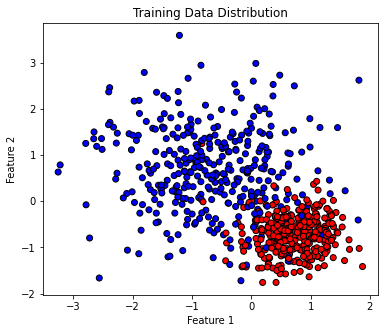

In [6]:
plt.figure(figsize=(6,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr', edgecolors='k')
plt.title('Training Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

C_values = [0.01, 0.1, 1, 10, 100]
train_errors = []
cv_errors = []
test_errors = []

for C in C_values:
    svm = SVC(kernel='poly', C=C, random_state=42)
    
    # Train Error
    svm.fit(X_train, y_train)
    y_train_pred = svm.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    
    # CV error
    cv_score = cross_val_score(svm, X_train, y_train, cv=5)
    cv_error = 1 - np.mean(cv_score)
    
    # Test error
    y_test_pred = svm.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    train_errors.append(train_error)
    cv_errors.append(cv_error)
    test_errors.append(test_error)


In [8]:
pd.DataFrame({
    'C': C_values,
    'Train Error': train_errors,
    'CV Error': cv_errors,
    'Test Error': test_errors
})

,C,Train Error,CV Error,Test Error
0,0.01,0.175714,0.195714,0.156667
1,0.10,0.091429,0.102857,0.083333
2,1.00,0.082857,0.080000,0.050000
3,10.00,0.088571,0.094286,0.070000
4,100.00,0.094286,0.088571,0.073333


In the previous table we can see the percentage of classification errors for the train error and CV error. As we can observe, given the C parameters, when these are very small they tend to give larger errors; however, as C increases these errors are reduced. Nevertheless, CV surpasses the training error at the point where C is optimal, that is, where in the next increase of C this error no longer decreases, meaning that this is the point before overfitting starts.

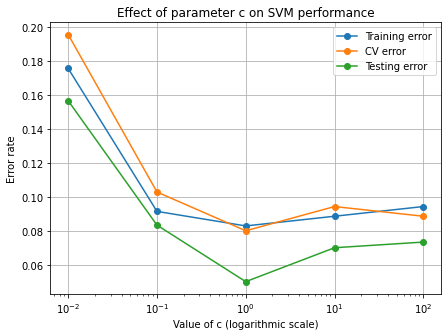

In [10]:
plt.figure(figsize=(7,5))
plt.plot(C_values, train_errors, marker='o', label='Training error')
plt.plot(C_values, cv_errors, marker='o', label='CV error')
plt.plot(C_values, test_errors, marker='o', label='Testing error')
plt.xscale('log')
plt.xlabel('Value of c (logarithmic scale)')
plt.ylabel('Error rate')
plt.title('Effect of parameter c on SVM performance')
plt.legend()
plt.grid(True)
plt.show()

The training errors for different values of C show that increasing C initially helps to reduce the error; however, when C becomes too large, the errors start to increase again due to overfitting. Likewise, cross-validation (CV) also allows us to find the optimal C value. In this case, the optimal value is C=1, which also minimizes the error on the test data. Similarly, CV and training error should help us determine an appropriate C before moving to the test set, since the test set should be the final step after choosing C, and it should not be used to tune or minimize C.

Discussion

What we have observed is that the values of C help reduce errors as C increases; however, there is an optimal point that must be selected, since if C continues to increase, the errors begin to grow due to overfitting.

In addition, the cross-validation error (CV error) tends to be lower than the training error and allows us to confirm which value of C is optimal, as this should be determined using the training set rather than the test set.

Finally, using a kernel when modeling the SVM, given that we have a small amount of data, allows the model to be executed more quickly and efficiently.